In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

print("Tensorflow version: "+tf.__version__)

Tensorflow version: 2.9.2


In [2]:
# Google file system
from google.colab import drive
drive.mount('/GoogleDrive', force_remount=True)

ATT_FILE =   "/GoogleDrive/My Drive/Colab Notebooks/RedesNeuronales/datasets/Fifa/FootballPlayerPreparedCleanAttributes.csv"
LABEL_FILE = "/GoogleDrive/My Drive/Colab Notebooks/RedesNeuronales/datasets/Fifa/FootballPlayerOneHotEncodedClasses.csv"

attributes = pd.read_csv(ATT_FILE)
label =      pd.read_csv(LABEL_FILE)

Mounted at /GoogleDrive


## Datasets

In [3]:
TRAIN_RATE = 0.8

n_instances = attributes.shape[0]

n_train = int(n_instances*TRAIN_RATE)
n_dev = int((n_instances-n_train)/2)
n_final_test = n_instances-n_train-n_dev

In [4]:
print("Total:", n_instances, "| Train:", n_train, "| Dev Test:", n_dev," | Final Test:", n_final_test)

Total: 16122 | Train: 12897 | Dev Test: 1612  | Final Test: 1613


In [5]:
x_train = attributes.values[:n_train]
t_train = label.values[:n_train]

x_dev = attributes.values[n_train:n_train + n_dev]
t_dev = label.values[n_train:n_train + n_dev]

x_final_test = attributes.values[n_train+n_dev:n_instances]
t_final_test = label.values[n_train+n_dev:n_instances]

INPUTS = x_train.shape[1]
OUTPUTS = t_train.shape[1]

In [6]:
print ("X_train:", x_train.shape, "| T_train:", t_train.shape)
print ("X_dev:", x_dev.shape, "| T_dev:", t_dev.shape)
print ("X_test:", x_final_test.shape, "| T_test:", t_final_test.shape)

X_train: (12897, 17) | T_train: (12897, 4)
X_dev: (1612, 17) | T_dev: (1612, 4)
X_test: (1613, 17) | T_test: (1613, 4)


## Model

In [7]:
n_neurons_per_layer = [500, 250, 75, 25]
learning_rate = 0.1
n_epochs = 1000 
batch_size = 512

In [8]:
model = keras.Sequential(name = "PatoNetwork")

In [9]:
model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))

for neurons in n_neurons_per_layer:
  model.add(keras.layers.Dense(neurons, activation="relu"))

model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

In [10]:
model.summary()

Model: "PatoNetwork"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               9000      
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dense_2 (Dense)             (None, 75)                18825     
                                                                 
 dense_3 (Dense)             (None, 25)                1900      
                                                                 
 dense_4 (Dense)             (None, 4)                 104       
                                                                 
Total params: 155,079
Trainable params: 155,079
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ["categorical_accuracy"])

## Training

In [12]:
start = time.perf_counter()

In [13]:
history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs = n_epochs, 
                    verbose = 1, 
                    validation_data = (x_dev, t_dev))

Epoch 1/1000
26/26 [==============================] - 2s 30ms/step - loss: 1.3110 - categorical_accuracy: 0.4510 - val_loss: 1.1953 - val_categorical_accuracy: 0.5515
Epoch 2/1000
26/26 [==============================] - 1s 22ms/step - loss: 1.0562 - categorical_accuracy: 0.5673 - val_loss: 0.9225 - val_categorical_accuracy: 0.6086
Epoch 3/1000
26/26 [==============================] - 1s 19ms/step - loss: 0.8167 - categorical_accuracy: 0.6588 - val_loss: 0.7420 - val_categorical_accuracy: 0.6979
Epoch 4/1000
26/26 [==============================] - 0s 18ms/step - loss: 0.6687 - categorical_accuracy: 0.7242 - val_loss: 0.6312 - val_categorical_accuracy: 0.7345
Epoch 5/1000
26/26 [==============================] - 1s 21ms/step - loss: 0.5837 - categorical_accuracy: 0.7514 - val_loss: 0.5749 - val_categorical_accuracy: 0.7413
Epoch 6/1000
26/26 [==============================] - 1s 25ms/step - loss: 0.6501 - categorical_accuracy: 0.7115 - val_loss: 0.5499 - val_categorical_accuracy: 0.763

In [14]:
results = pd.DataFrame(history.history)

In [15]:
print ("Time: ", time.perf_counter() - start, "seconds")
print ("Training Set Accuracy: ", results.categorical_accuracy.values[-1:][0] * 100, "%")
print ("Development Set Test Accuracy: ", results.val_categorical_accuracy.values[-1:][0] * 100, "%")

Time:  622.779405435 seconds
Training Set Accuracy:  100.0 %
Development Set Test Accuracy:  77.85359621047974 %


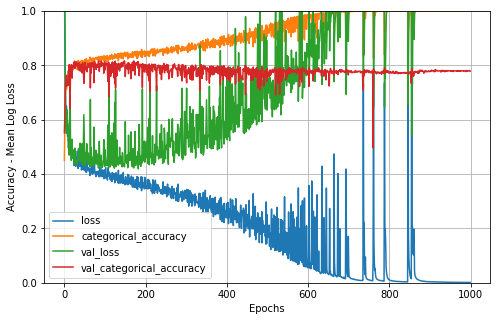

In [16]:
results.plot(figsize = (8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
dev_predictions=model.predict(x_dev).round(2)
dev_predictions[:20]

51/51 [==============================] - 0s 3ms/step


array([[1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.18, 0.82, 0.  ],
       [0.  , 0.78, 0.22, 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.94, 0.06, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.95, 0.05, 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.03, 0.97, 0.  ],
       [0.  , 0.  , 0.09, 0.91],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.18, 0.02, 0.73, 0.07],
       [0.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.46, 0.54, 0.  ],
       [0.  , 0.  , 1.  , 0.  ]], dtype=float32)

In [19]:
dev_rounded_predictions=np.round(dev_predictions)
indices = np.argmax(dev_predictions,1)
for row, index in zip(dev_rounded_predictions, indices): row[index]=1
dev_rounded_predictions[:20]

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [20]:
t_dev[:20] #target classes

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [21]:
dev_correct_predictions = np.equal(np.argmax(dev_rounded_predictions,1),np.argmax(t_dev,1))
print (dev_correct_predictions[:30])

[ True  True  True False False False False False  True  True  True  True
 False False  True False False  True  True False  True  True  True False
  True  True  True  True False  True]


In [23]:
from collections import Counter
Counter (dev_correct_predictions)

Counter({True: 1255, False: 357})

## Final Test

In [17]:
final_results = model.evaluate(x_final_test, t_final_test)

print ("Final Test Accuracy: ", final_results[1] * 100, "%")

51/51 [==============================] - 0s 5ms/step - loss: 1.6662 - categorical_accuracy: 0.7867
Final Test Accuracy:  78.67327928543091 %
